In [9]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/Nlp project/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv', header=0)

In [10]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [11]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
for i in df['reviews.text']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
df['polarity']=polarity

In [13]:
bins = [-1, -0.6, -0.2, 0.2, 0.4, 1]
names = ['1','2','3','4','5']
df['new_polarity'] = pd.cut(df['polarity'], bins, labels=names)

In [15]:
#print(df1[df1['new_polarity'].isnull()])
df['new_polarity'] = pd.to_numeric(df['new_polarity'], errors='coerce')
df = df.dropna(subset=['new_polarity'])

In [16]:
df['new_polarity'] = df['new_polarity'].astype('int64')

In [17]:
grouped = df.groupby('province')
df_AL = grouped.get_group('AL')
df_AR = grouped.get_group('AR')
df_AZ = grouped.get_group('AZ')
df_CA = grouped.get_group('CA')
df_CO = grouped.get_group('CO')
df_FL = grouped.get_group('FL')
df_GA = grouped.get_group('GA')
df_HI = grouped.get_group('HI')
df_IA = grouped.get_group('IA')
df_ID = grouped.get_group('ID')
df_IL = grouped.get_group('IL')
df_IN = grouped.get_group('IN')
df_KS = grouped.get_group('KS')
df_KY = grouped.get_group('KY')
df_LA = grouped.get_group('LA')
df_MA = grouped.get_group('MA')
df_MD = grouped.get_group('MD')
df_MI = grouped.get_group('MI')
df_MN = grouped.get_group('MN')
df_MO = grouped.get_group('MO')
df_MS = grouped.get_group('MS')
df_MT = grouped.get_group('MT')
df_NC = grouped.get_group('NC')
df_NE = grouped.get_group('NE')
df_NJ = grouped.get_group('NJ')
df_NM = grouped.get_group('NM')
df_NV = grouped.get_group('NV')
df_NY = grouped.get_group('NY')
df_OH = grouped.get_group('OH')
df_OK = grouped.get_group('OK')
df_OR = grouped.get_group('OR')
df_PA = grouped.get_group('PA')
df_SC = grouped.get_group('SC')
df_SD = grouped.get_group('SD')
df_TN = grouped.get_group('TN')
df_TX = grouped.get_group('TX')
df_UT = grouped.get_group('UT')
df_WA = grouped.get_group('WA')
df_WI = grouped.get_group('WI')
df_WV = grouped.get_group('WV')
df_WY = grouped.get_group('WY')

# hotel reviews in AL

In [20]:
df_AL = df_AL[['name','reviews.text','polarity','new_polarity','reviews.rating']]
df_AL.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
541,Motel 6-opelika,This has been one of the most accomadating hot...,0.321667,4,5
1915,Fairfield Inn by Marriott Huntsville,I recently stayed for 2 nights. This is a grea...,0.324074,4,4
1916,Fairfield Inn by Marriott Huntsville,My husband I were in Huntsville for a family f...,0.277273,4,5
1917,Fairfield Inn by Marriott Huntsville,This hotel is clean and decent but most of all...,0.338889,4,4
1918,Fairfield Inn by Marriott Huntsville,I came back to visit my family for the holiday...,0.106944,3,5


In [33]:
accuracy = (len(df_AL[df_AL['new_polarity'] == df_AL['reviews.rating']])/len(df_AL)) *100
print("All reviews accuracy in AL:", accuracy)


All reviews accuracy in AL: 44.44444444444444


In [25]:
#positive comments
pos_com_AL = df_AL[df_AL.polarity>0]
pos_com_AL.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
541,Motel 6-opelika,This has been one of the most accomadating hot...,0.321667,4,5
1915,Fairfield Inn by Marriott Huntsville,I recently stayed for 2 nights. This is a grea...,0.324074,4,4
1916,Fairfield Inn by Marriott Huntsville,My husband I were in Huntsville for a family f...,0.277273,4,5
1917,Fairfield Inn by Marriott Huntsville,This hotel is clean and decent but most of all...,0.338889,4,4
1918,Fairfield Inn by Marriott Huntsville,I came back to visit my family for the holiday...,0.106944,3,5


In [34]:
accuracy = (len(pos_com_AL[pos_com_AL['new_polarity'] == pos_com_AL['reviews.rating']])/len(pos_com_AL)) * 100
print("positive reviews accuracy in AL:", accuracy)
difference = (len(pos_com_AL[pos_com_AL['new_polarity'] != pos_com_AL['reviews.rating']])/len(pos_com_AL)) * 100
print("positive reviews difference rate in AL:", difference)

positive reviews accuracy in AL: 43.54838709677419
positive reviews difference rate in AL: 56.451612903225815


In [35]:
#negative comments
neg_com_AL = df_AL[df_AL.polarity<0]
neg_com_AL.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
3728,Quality Inn,Great check in staff. The price was right for ...,-0.052381,3,3


In [36]:
accuracy = (len(neg_com_AL[neg_com_AL['new_polarity'] == neg_com_AL['reviews.rating']])/len(neg_com_AL)) * 100
print("negative reviews accuracy in AL:", accuracy)
difference = (len(neg_com_AL[neg_com_AL['new_polarity'] != neg_com_AL['reviews.rating']])/len(neg_com_AL)) * 100
print("negative reviews difference rate in AL:", difference)


negative reviews accuracy in AL: 100.0
negative reviews difference rate in AL: 0.0


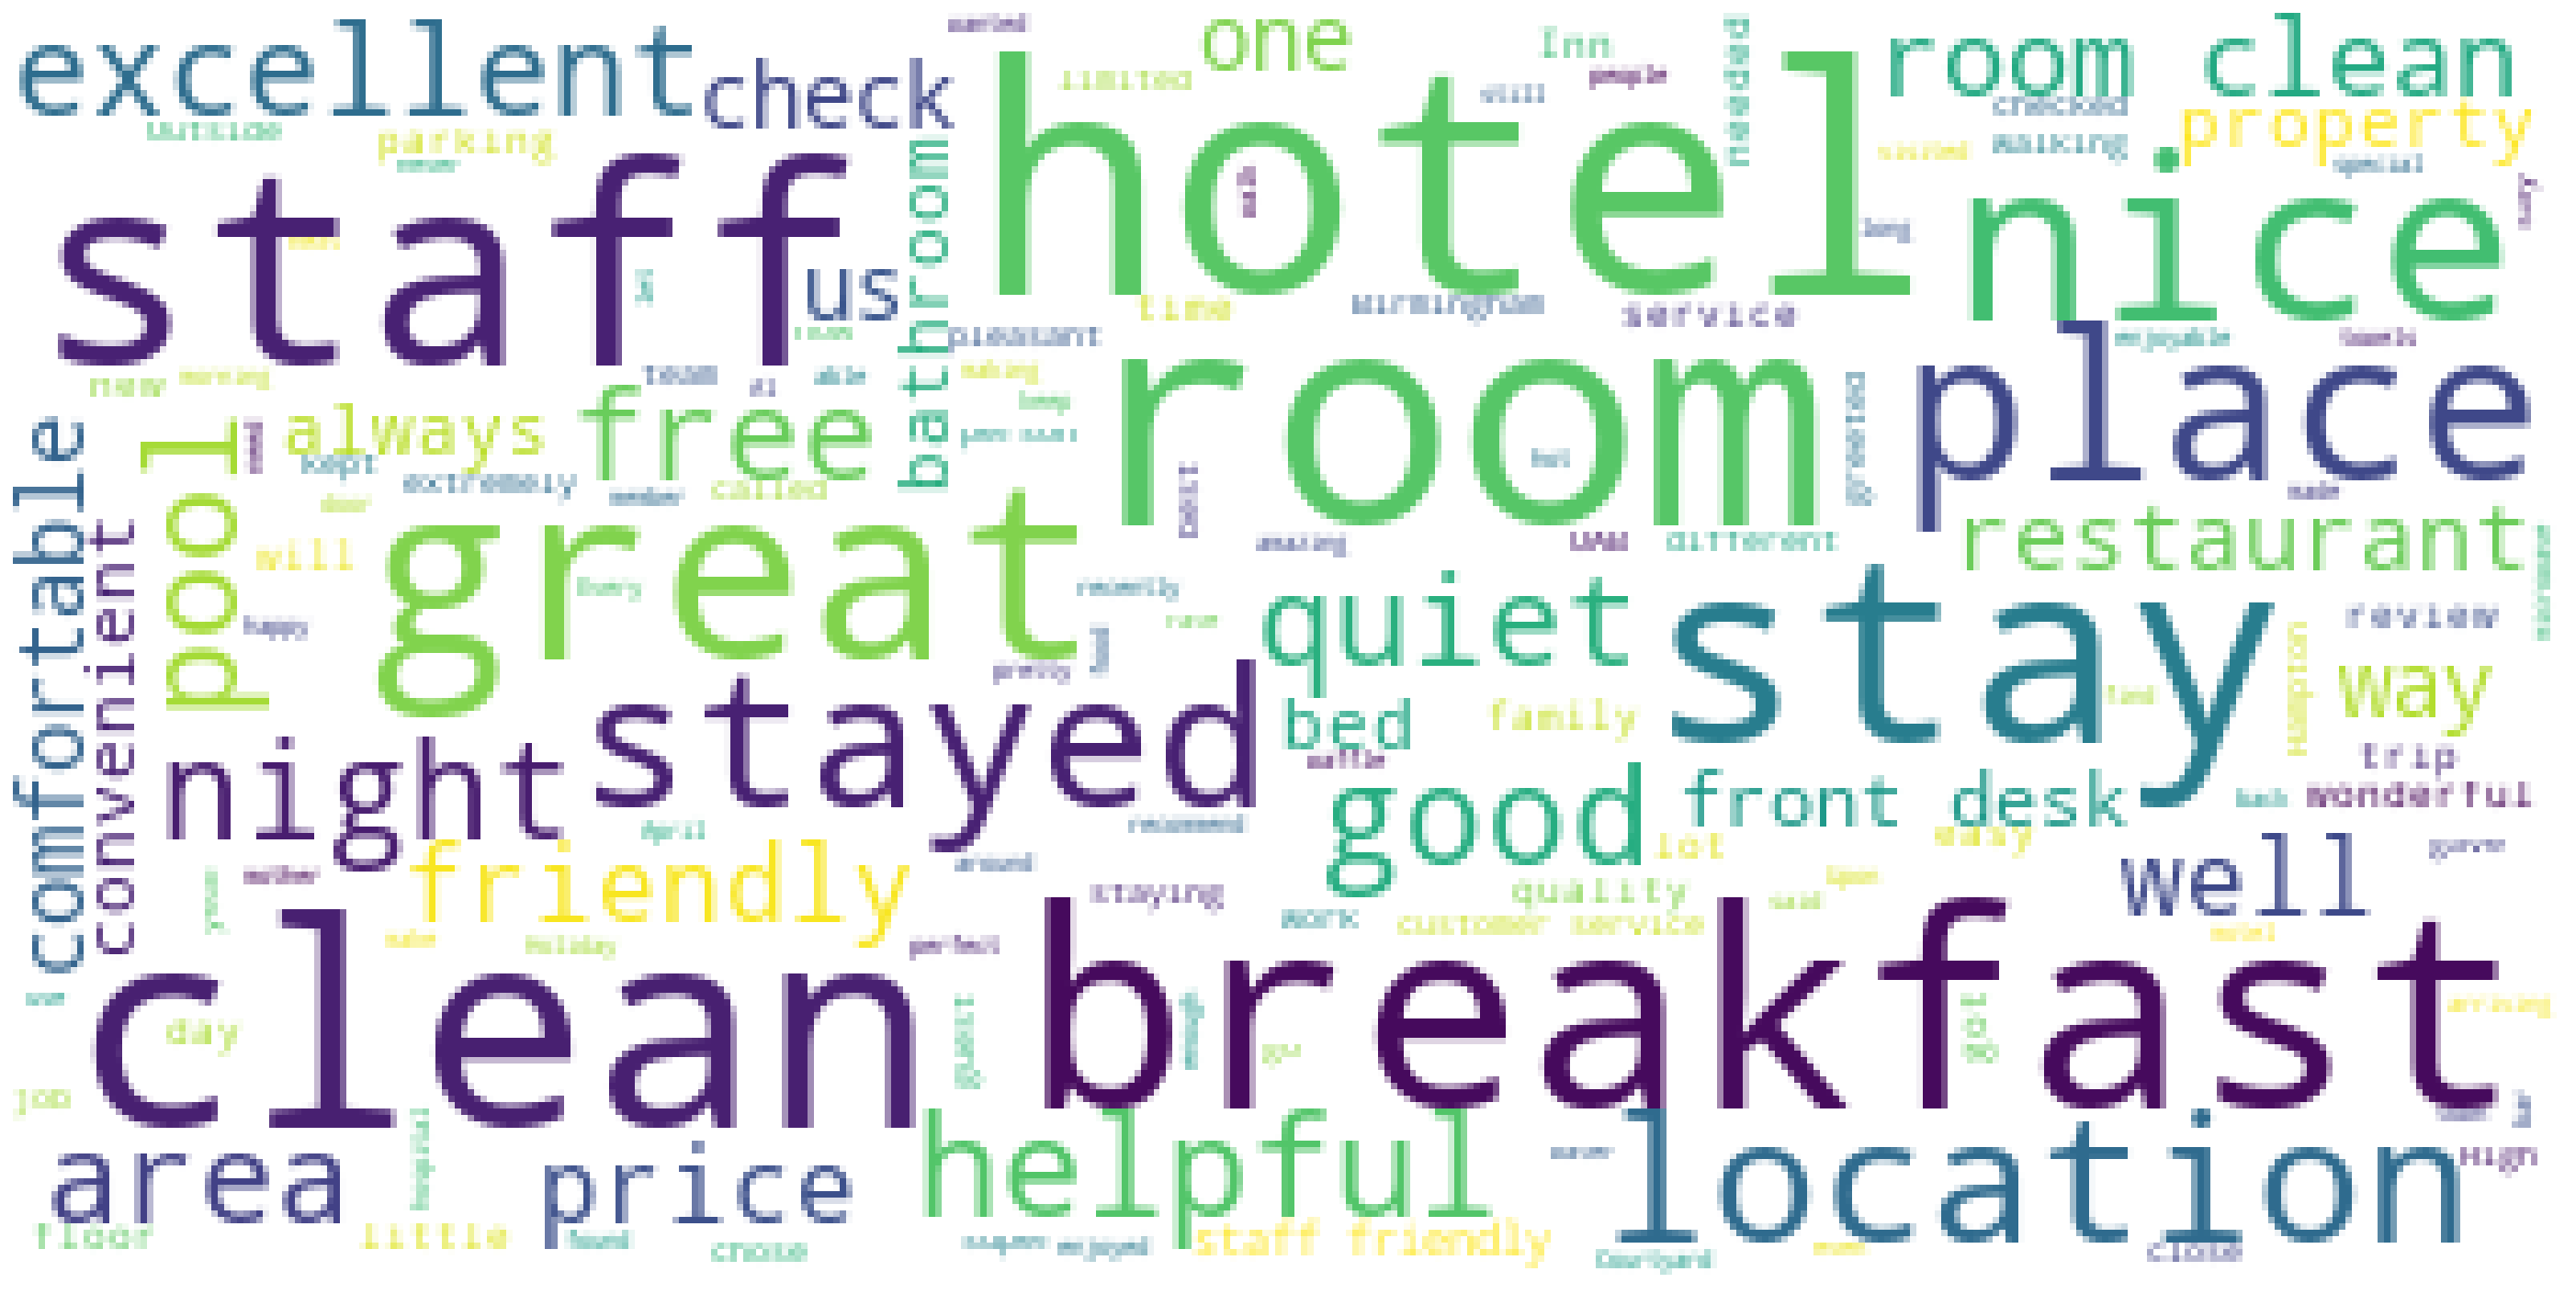

In [37]:
#highly positive reviews
wc(df_AL['reviews.text'][df_AL.polarity>0],'white','Common Words' )

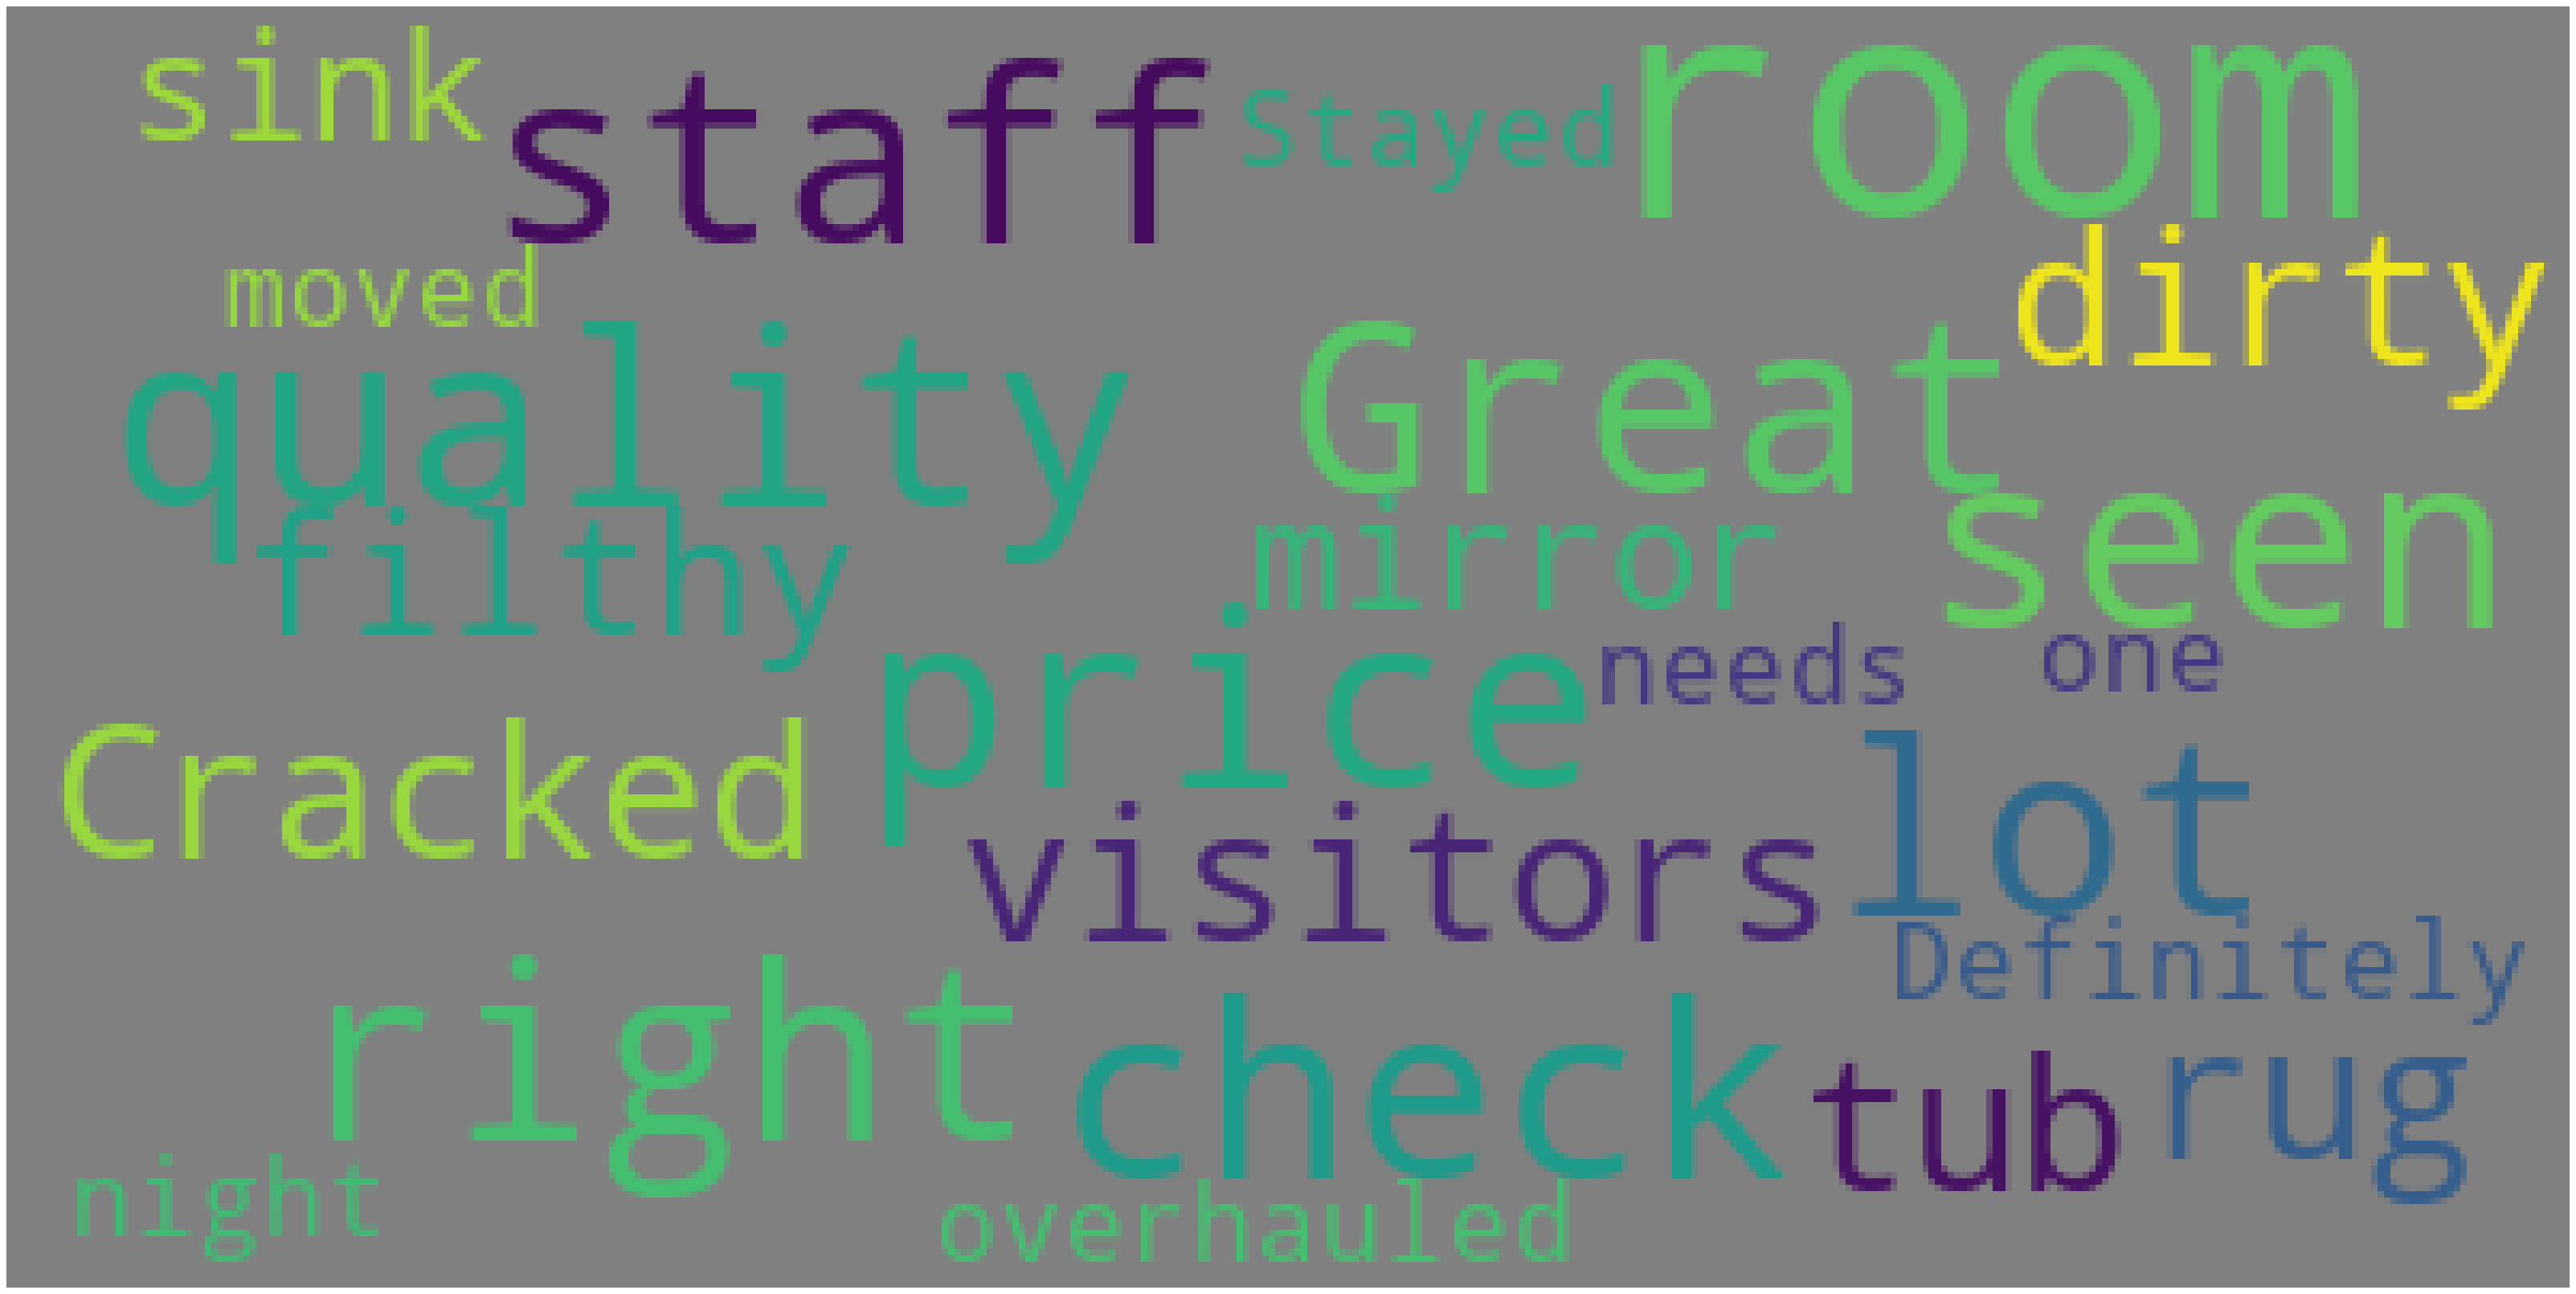

In [38]:
#highly negative reviews
wc(df_AL['reviews.text'][df_AL.polarity<0],'grey','Common Words' )

In [39]:
df_AL['polarity'][df_AL.polarity > 0]= 1
df_AL['polarity'][df_AL.polarity < 0]= -1

 1.0    62
-1.0     1
Name: polarity, dtype: int64

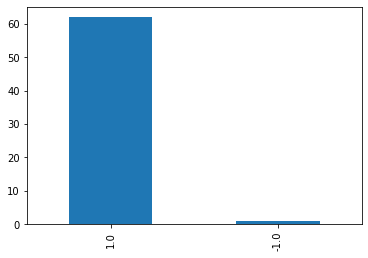

In [40]:
df_AL.polarity.value_counts().plot.bar()
df_AL.polarity.value_counts()